In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load FLAT_RCL_POST_2010.xlsx into dataframe df
df = pd.read_excel('data/FLAT_RCL_POST_2010.xlsx')
#display first 5 rows of df
print(df.head())

   RECORD_ID     CAMPNO   MAKETXT    MODELTXT  YEARTXT MFGCAMPNO  \
0      81715  10V333000  ROADTREK        19PC     2008   2010-01   
1      81716  10E012000       ACC     EXT-003     9999       NaN   
2      81717  10V241000  KEYSTONE   RESIDENCE     2011    10-139   
3      81718  10V310000    IC BUS          FE     2009       NaN   
4      81719  10V484000  CARRIAGE  CARRI-LITE     2004       NaN   

                                 COMPNAME                          MFGNAME  \
0                                   SEATS         ROADTREK MOTORHOMES INC.   
1            EQUIPMENT:MOTORCYCLE:HELMETS  ADVANCED CARBON COMPOSITES INC.   
2  EQUIPMENT:RECREATIONAL VEHICLE/TRAILER              KEYSTONE RV COMPANY   
3               ENGINE AND ENGINE COOLING                    NAVISTAR, INC   
4                               EQUIPMENT                    CARRIAGE, INC   

        BGMAN      ENDMAN  ... Unnamed: 26  Unnamed: 27  Unnamed: 28  \
0  20080101.0  20100101.0  ...         NaN        

In [3]:
df.columns

Index(['RECORD_ID', 'CAMPNO', 'MAKETXT', 'MODELTXT', 'YEARTXT', 'MFGCAMPNO',
       'COMPNAME', 'MFGNAME', 'BGMAN', 'ENDMAN', 'RCLTYPECD', 'POTAFF',
       'ODATE', 'INFLUENCED_BY', 'MFGTXT', 'RCDATE', 'DATEA', 'RPNO', 'FMVSS',
       'DESC_DEFECT', 'CONEQUENCE_DEFECT', 'CORRECTIVE_ACTION', 'NOTES',
       'RCL_CMPT_ID', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35'],
      dtype='object')

In [5]:
df.describe()

,RECORD_ID,YEARTXT,BGMAN,ENDMAN,POTAFF,ODATE,RCDATE,DATEA,RCL_CMPT_ID,Unnamed: 30
count,214572.00000,214572.000000,6.431000e+04,6.419400e+04,2.145720e+05,2.119410e+05,2.145720e+05,2.145720e+05,2.145720e+05,1.000000e+00
mean,189001.13800,2910.041995,2.011178e+07,2.015110e+07,3.303721e+05,2.020058e+07,2.020115e+07,2.020119e+07,1.028190e+23,1.193310e+23
std,61942.49786,2516.535068,1.166539e+05,1.295272e+05,5.953649e+05,1.662816e+05,3.817484e+04,3.815540e+04,2.922930e+22,NaN
min,81715.00000,1965.000000,2.090211e+06,2.040211e+06,0.000000e+00,1.111111e+07,2.010010e+07,2.010010e+07,3.439700e+22,1.193310e+23
25%,135357.75000,2014.000000,2.007033e+07,2.012062e+07,9.245000e+02,2.018080e+07,2.018060e+07,2.018061e+07,8.692600e+22,1.193310e+23
50%,189000.50000,2019.000000,2.011090e+07,2.015061e+07,2.486900e+04,2.021063e+07,2.021050e+07,2.021051e+07,1.102410e+23,1.193310e+23
75%,242645.25000,2021.000000,2.015101e+07,2.018031e+07,5.416320e+05,2.023072e+07,2.023061e+07,2.023061e+07,1.253430e+23,1.193310e+23
max,296288.00000,9999.000000,3.019051e+07,3.019043e+07,1.760000e+07,2.025061e+07,2.025061e+07,2.025061e+07,2.602810e+23,1.193310e+23


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214572 entries, 0 to 214571
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   RECORD_ID          214572 non-null  int64  
 1   CAMPNO             214572 non-null  object 
 2   MAKETXT            214572 non-null  object 
 3   MODELTXT           214572 non-null  object 
 4   YEARTXT            214572 non-null  int64  
 5   MFGCAMPNO          154432 non-null  object 
 6   COMPNAME           214572 non-null  object 
 7   MFGNAME            214572 non-null  object 
 8   BGMAN              64310 non-null   float64
 9   ENDMAN             64194 non-null   float64
 10  RCLTYPECD          214572 non-null  object 
 11  POTAFF             214572 non-null  int64  
 12  ODATE              211941 non-null  float64
 13  INFLUENCED_BY      214546 non-null  object 
 14  MFGTXT             214572 non-null  object 
 15  RCDATE             214572 non-null  int64  
 16  DA

In [ ]:
# Create a new POTAFF_unique column which will have value only once per CAMPNO.
# If there are multiple rows for the same CAMPNO, we will take the maximum value of POTAFF column.
# We will not drop the duplicate rows based on CAMPNO column since thats needed to count the number of occurrences of each CAMPNO.
def add_unique_potaff_column(df):
    # Assume df has columns: CAMPNO, POTAFF
    import numpy as np

    # Initialize the unique column to zero
    df['POTAFF_unique'] = 0

    # For each group, select the first occurrence and set the unique values
    first_idx = df.groupby('CAMPNO', sort=False).head(1).index
    df.loc[first_idx, 'POTAFF_unique'] = df.loc[first_idx, 'POTAFF']

    return df
# Add the unique POTAFF column to the dataframe
df = add_unique_potaff_column(df)


In [21]:
# The COMPNAME column has major component name & minor component name separated by a colon. 
# Add a new column COMPNAME_MAJOR which will have the major component name.
def add_major_component_column(df):
    # Split the COMPNAME column by ':' and take the first part as the major component
    df['COMPNAME_MAJOR'] = df['COMPNAME'].str.split(':').str[0]
    return df
# Add the major component column to the dataframe
df = add_major_component_column(df)

In [5]:
# Extract year from the RCDATE numeric column
df['year'] = df['RCDATE'].astype(str).str[:4].astype(int)
df.head()

,RECORD_ID,CAMPNO,MAKETXT,MODELTXT,YEARTXT,MFGCAMPNO,COMPNAME,MFGNAME,BGMAN,ENDMAN,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,POTAFF_unique,year
0,81715,10V333000,ROADTREK,19PC,2008,2010-01,SEATS,ROADTREK MOTORHOMES INC.,20080101.0,20100101.0,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,644,2010
1,81716,10E012000,ACC,EXT-003,9999,NaN,EQUIPMENT:MOTORCYCLE:HELMETS,ADVANCED CARBON COMPOSITES INC.,NaN,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21084,2010
2,81717,10V241000,KEYSTONE,RESIDENCE,2011,10-139,EQUIPMENT:RECREATIONAL VEHICLE/TRAILER,KEYSTONE RV COMPANY,20100318.0,20100413.0,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,2010
3,81718,10V310000,IC BUS,FE,2009,NaN,ENGINE AND ENGINE COOLING,"NAVISTAR, INC",20070205.0,20080924.0,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2010
4,81719,10V484000,CARRIAGE,CARRI-LITE,2004,NaN,EQUIPMENT,"CARRIAGE, INC",NaN,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,394,2010


In [22]:
# Save the modified dataframe to a new Excel file
df.to_excel('data/FLAT_RCL_POST_2010_modified.xlsx', index=False)

ALL DATA IS CLEANED UPTO THIS POINT. LOAD STORED CLEAN DATA & ANALLYZE

In [2]:
# load data from data/cleaned_data_with_death_reported.csv
df = pd.read_excel('data/FLAT_RCL_POST_2010_modified.xlsx')

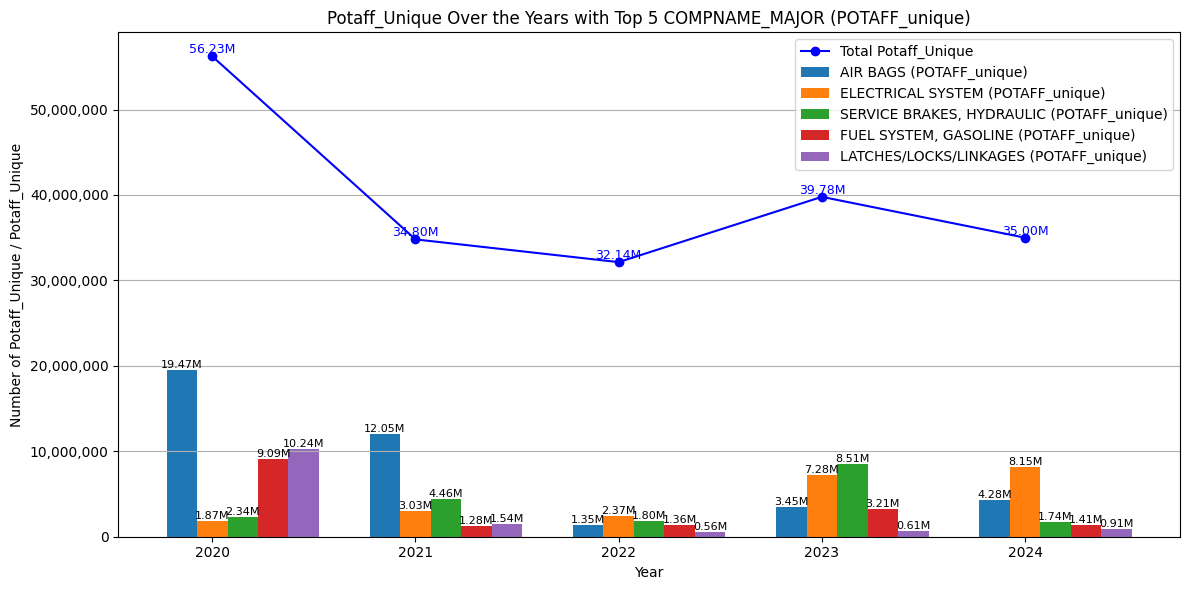

In [24]:
def analysis(line_column='POTAFF_unique', bar_column='POTAFF_unique', group_column='COMPNAME_MAJOR', top_n=5, from_year=2020, to_year=2024):
    # Filter by year range if specified
    filtered_df = df
    if from_year is not None:
        filtered_df = filtered_df[filtered_df['year'] >= from_year]
    if to_year is not None:
        filtered_df = filtered_df[filtered_df['year'] <= to_year]

    # Group the data by year and sum the selected columns
    values_over_years = filtered_df.groupby('year')[line_column].sum()
    # Get the top N groups with the most bar_column values
    top_groups = filtered_df.groupby(group_column)[bar_column].sum().nlargest(top_n)

    plt.figure(figsize=(12, 6))

    # Line graph for line_column over the years
    plt.plot(values_over_years.index, values_over_years.values, marker='o', label=f'Total {line_column.title()}', color='blue')
    for x, y in zip(values_over_years.index, values_over_years.values):
        plt.text(x, y, f"{y/1e6:.2f}M", color='blue', fontsize=9, ha='center', va='bottom')

    # Overlay bar graphs for top N groups (using bar_column)
    bar_width = 0.15
    for i, (group, val) in enumerate(top_groups.items()):
        group_vals_by_year = filtered_df[filtered_df[group_column] == group].groupby('year')[bar_column].sum().reindex(values_over_years.index, fill_value=0)
        plt.bar(
            values_over_years.index + i * bar_width - bar_width,
            group_vals_by_year.values,
            width=bar_width,
            label=f"{group} ({bar_column})"
        )
        for x, y in zip(values_over_years.index + i * bar_width - bar_width, group_vals_by_year.values):
            if y > 0:
                plt.text(x, y, f"{y/1e6:.2f}M", color='black', fontsize=8, ha='center', va='bottom')

    plt.title(f'{line_column.title()} Over the Years with Top {top_n} {group_column} ({bar_column})')
    plt.xlabel('Year')
    plt.ylabel(f'Number of {line_column.title()} / {bar_column.title()}')
    plt.legend()
    plt.grid(axis='y')
    plt.xticks(values_over_years.index)
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    plt.tight_layout()
    plt.show()

# Example usage:
analysis(from_year=2020, to_year=2024)

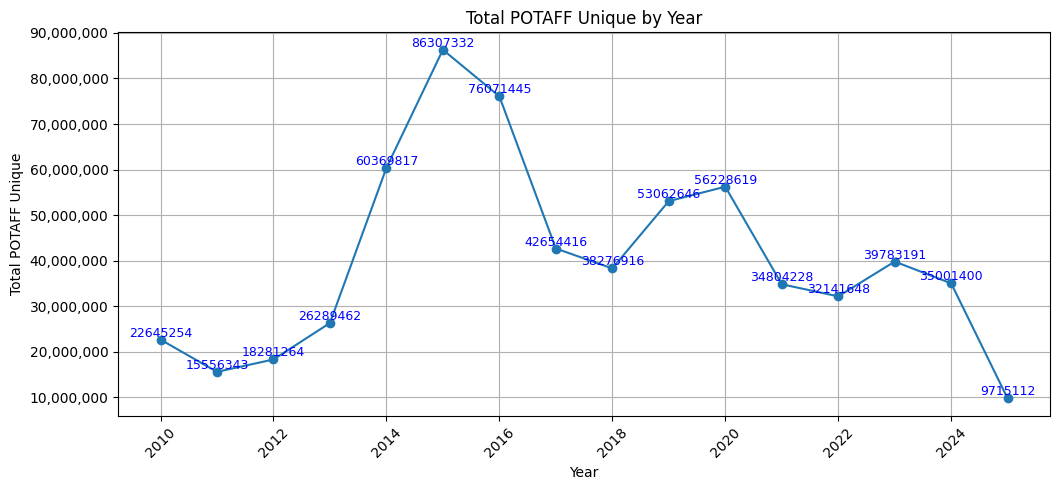

In [16]:
from matplotlib.ticker import StrMethodFormatter

# Create a line graph by year based on POTAFF_unique
def plot_potaff_by_year():
    plt.figure(figsize=(10, 5))
    potaff_by_year = df.groupby('year')['POTAFF_unique'].sum()
    plt.plot(potaff_by_year.index, potaff_by_year.values, marker='o')
    for x, y in zip(potaff_by_year.index, potaff_by_year.values):
        plt.text(x, y, str(y), color='blue', fontsize=9, ha='center', va='bottom')
    plt.title('Total POTAFF Unique by Year')
    plt.xlabel('Year')
    plt.ylabel('Total POTAFF Unique')
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    # Show y-axis in plain integer format
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    plt.show()
# Call the function to plot POTAFF unique by year
plot_potaff_by_year()

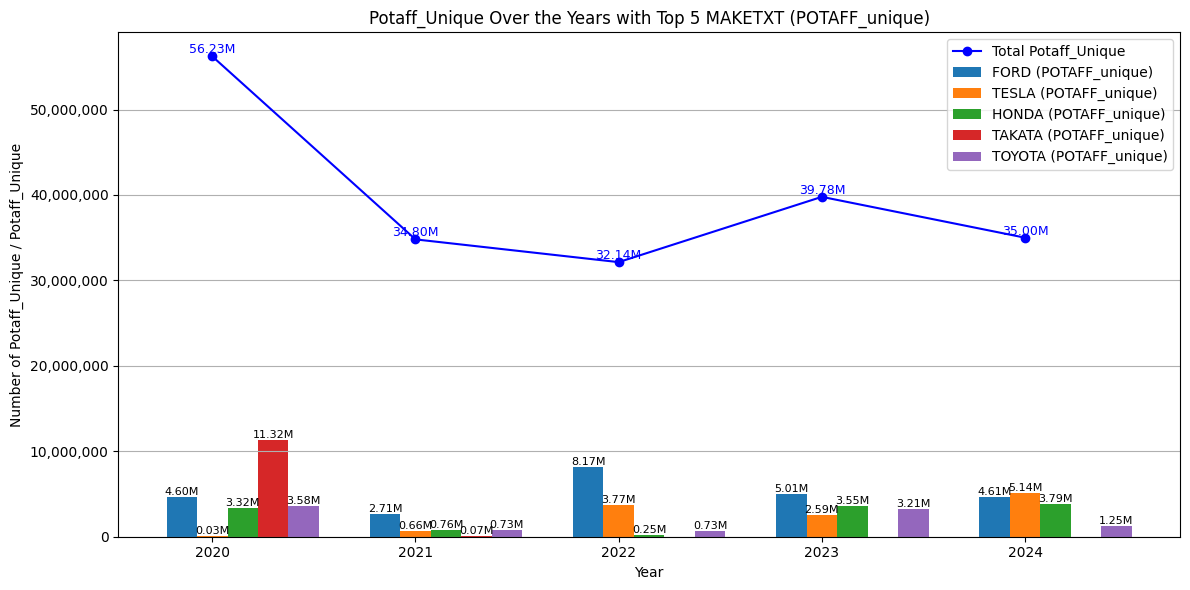

In [25]:
analysis(from_year=2020, to_year=2024, group_column="MAKETXT")

In [3]:
# display unique years from df
unique_years = df['year'].unique()
print("Unique years in the dataset:", unique_years)

Unique years in the dataset: [2010 2011 2012 2013 2015 2014 2016 2017 2018 2019 2020 2021 2022 2023
 2024 2025]


In [4]:
#Make a copy for years 2018 to 2024
df_2018_to_2024 = df[(df['year'] >= 2018) & (df['year'] <= 2024)].copy()
df_2018_to_2024.describe()

,RECORD_ID,YEARTXT,BGMAN,ENDMAN,POTAFF,ODATE,RCDATE,DATEA,RCL_CMPT_ID,Unnamed: 30,POTAFF_unique,year
count,159975.000000,159975.000000,2.349000e+04,2.349200e+04,1.599750e+05,1.591630e+05,1.599750e+05,1.599750e+05,1.599750e+05,1.000000e+00,1.599750e+05,159975.000000
mean,211576.779353,3115.718018,2.013789e+07,2.018023e+07,3.914600e+05,2.022125e+07,2.021851e+07,2.021855e+07,1.160041e+23,1.193310e+23,1.808399e+03,2021.782741
std,46181.808742,2748.146202,1.637764e+05,1.383618e+05,5.951608e+05,1.858572e+04,1.685562e+04,1.679578e+04,1.105592e+22,NaN,5.225226e+04,1.672307
min,131588.000000,1965.000000,2.090211e+06,1.900010e+07,0.000000e+00,2.016122e+07,2.018010e+07,2.018010e+07,8.070600e+22,1.193310e+23,0.000000e+00,2018.000000
25%,171582.500000,2018.000000,2.009053e+07,2.016072e+07,1.836000e+03,2.021031e+07,2.021020e+07,2.021021e+07,1.084710e+23,1.193310e+23,0.000000e+00,2021.000000
50%,211576.000000,2020.000000,2.016012e+07,2.018082e+07,1.020920e+05,2.022071e+07,2.022041e+07,2.022041e+07,1.196990e+23,1.193310e+23,0.000000e+00,2022.000000
75%,251571.500000,2022.000000,2.018110e+07,2.020091e+07,5.416320e+05,2.024032e+07,2.023122e+07,2.023122e+07,1.262840e+23,1.193310e+23,0.000000e+00,2023.000000
max,291565.000000,9999.000000,3.019051e+07,3.019043e+07,1.000000e+07,2.025053e+07,2.024123e+07,2.024123e+07,1.277940e+23,1.193310e+23,1.000000e+07,2024.000000
